# **Lab 6: Runge-Kutta 2nd Order Method for Ordinary Differential Equations**<br>

Ordinary Differential Equation (ODE) is a differential equation consisting of one or more functions of a single independent variable and the derivatives of those functions. Finding derivatives analytically is a complex procedure, involving a lot of rules. Computers and calculators find derivatives using some sort of numerical methods. Here, our target is to estimate a function at discrete points given its differential equation using the **Runge-Kutta 2nd Order method**. An important thing to note here is that this method can only solve first order ODE of the form $$ \frac{dy}{dx}=f(x,y), y(x_0)=y_0 $$

In today's lab, we will be implementing the **Runge-Kutta 2nd Order method** for solving a first order ODE in python. Refer to the example in the lecture slide.

The following is the problem you need to solve.
<br>
A ball at $1200K$ is allowed to cool down in air at an ambient temperature of $300K$. Assuming heat is lost only due to radiation, the differential equation for the temperature of the ball is given by $$\frac{d\theta}{dt}=-2.2067\times 10^{-12} (\theta^4 - 81 \times 10^8), y(0)=1,\theta(0)=1200K$$ where $\theta$ is in $K$ and $t$ in seconds. Find the temperature at $t=480$ seconds using Runge-Kutta 2nd Order method. Assume a step size of $h=240$ seconds. Compare with the exact value.

##Task 1
Implement the bivariate function $f(t, \theta)$ and the algorthim for Runge-Kutta 2nd Order method. Use the **Heun's method** assumption $\displaystyle a_2 = \frac{1}{2}$.
$$\theta_{i+1} = \theta_i + \left( \frac{1}{2}k_1 +  \frac{1}{2}k_2\right)h$$
$$k_1 = f(t_i,\theta_i)$$
$$k_2 = f(t_i + h, \theta_i + k_1h)$$ where $h=t_{i+1}-t_i$ is the step size.

In [ ]:
def f(t, theta):
    return -2.2067e-12 * (theta**4 - 81e8)

def RungeKutta2(t_0, theta_0, h, t_target):
    while t_0 < t_target:
        k1 = f(t_0, theta_0)
        k2 = f(t_0 + h, theta_0 + k1 * h)
        theta_0 += 0.5 * (k1 + k2) * h
        t_0 += h
    return theta_0


In [ ]:
print(f'Temperature at t = 480s with step size h = 240s is {RungeKutta2(0,1200,240,480)}K')

Temperature at t = 480s with step size h = 240s is 584.2684867703111K


Your answer should be $\approx 584.27K$.

##Task 2
Calculate the exact solution of the ODE. It is the root of the nonlinear equation
$$ 0.92593\ln\left( \frac{\theta-300}{\theta+300} \right) - 1.8519\tan^{-1}(0.333\times10^{-2}\theta) = -0.22067\times 10^{-3}t - 2.9282 $$ at $t=480$ seconds.

You can use your own root-finding algorithm or you can use the `fsolve()` function from the `scipy` package. (https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fsolve.html)

In [ ]:
from scipy.optimize import fsolve
import numpy as np

def equation_to_solve(theta, t):
    result = (theta - 300) / (theta + 300)
    if result <= 0:
        return np.nan
    else:
        return 0.92593 * np.log(result) - 1.8519 * np.arctan(0.333 * 10**-2 * theta) + 0.22067 * 10**-3 * t + 2.9282


def find_exact_solution(t):
    initial_guess = 1200
    exact_solution = fsolve(equation_to_solve, initial_guess, args=(t,))
    return exact_solution[0]

exact_value = find_exact_solution(480)
print(f'The exact temperature at t = 480s is approximately {exact_value:.2f}K')


The exact temperature at t = 480s is approximately 646.50K


The exact value should be $\theta_{exact} \approx 647.57K$.

Now, approximate the value of $\theta(480)$ using different step sizes, such as $480, 240, 120, 60,$ and $30$. Calculate the Global Truncation Error $E_t$ and the Absolute Relative True Error $|\epsilon_t|\%$ in each case.

In [ ]:
def RungeKutta2_with_error(t_0, theta_0, h, t_target, exact_value):
    theta_approx = RungeKutta2(t_0, theta_0, h, t_target)
    et = exact_value - theta_approx
    epsilon_t = abs((exact_value - theta_approx) / exact_value) * 100
    return theta_approx, et, epsilon_t

step_sizes = [480, 240, 120, 60, 30]
exact_theta_480 = find_exact_solution(480)

for step_size in step_sizes:
    approx_theta_480, error, rel_error = RungeKutta2_with_error(0, 1200, step_size, 480, exact_theta_480)
    print(f"Step size: {step_size}s -> Approximated theta(480): {approx_theta_480:.2f}K, "
          f"Global Truncation Error (Et): {error:.2f}K, Absolute Relative True Error (|epsilon_t|%): {rel_error:.2f}%")


Step size: 480s -> Approximated theta(480): -393.87K, Global Truncation Error (Et): 1040.37K, Absolute Relative True Error (|epsilon_t|%): 160.92%
Step size: 240s -> Approximated theta(480): 584.27K, Global Truncation Error (Et): 62.23K, Absolute Relative True Error (|epsilon_t|%): 9.63%
Step size: 120s -> Approximated theta(480): 651.35K, Global Truncation Error (Et): -4.85K, Absolute Relative True Error (|epsilon_t|%): 0.75%
Step size: 60s -> Approximated theta(480): 649.91K, Global Truncation Error (Et): -3.42K, Absolute Relative True Error (|epsilon_t|%): 0.53%
Step size: 30s -> Approximated theta(480): 648.21K, Global Truncation Error (Et): -1.71K, Absolute Relative True Error (|epsilon_t|%): 0.26%


Your values should approximately match the values of this table.
<br>
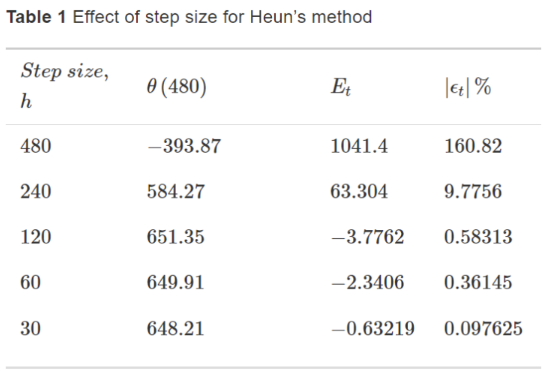

## Task 3
Generate a Temperature $(\theta)$ vs Step size $(h)$ plot which portrays the effect of step size in Runge-Kutta 2nd Order method. Use a different marker to represent the exact value.

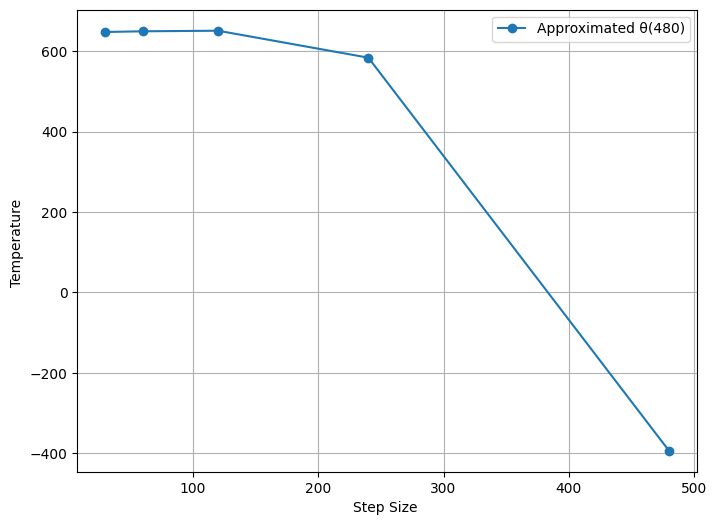

In [ ]:
import matplotlib.pyplot as plt

step_sizes = [480, 240, 120, 60, 30]

approximated_values = []
for step_size in step_sizes:
    approx_theta_480, _, _ = RungeKutta2_with_error(0, 1200, step_size, 480, find_exact_solution(480))
    approximated_values.append(approx_theta_480)

plt.figure(figsize=(8, 6))
plt.plot(step_sizes, approximated_values, marker='o', label='Approximated θ(480)')


plt.xlabel('Step Size ')
plt.ylabel('Temperature ')
plt.legend()
plt.grid(True)
plt.show()


Your graph should look something like,
<br>
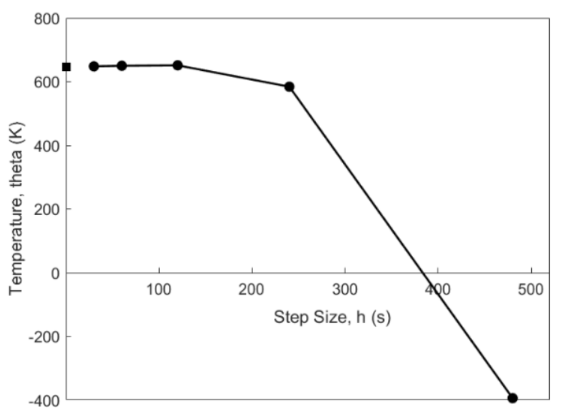

Genrerate a Temperature $\theta$ vs Time $t$ plot that compares the Runge-Kutta 2nd Order method approximations for different step sizes with the exact solution.

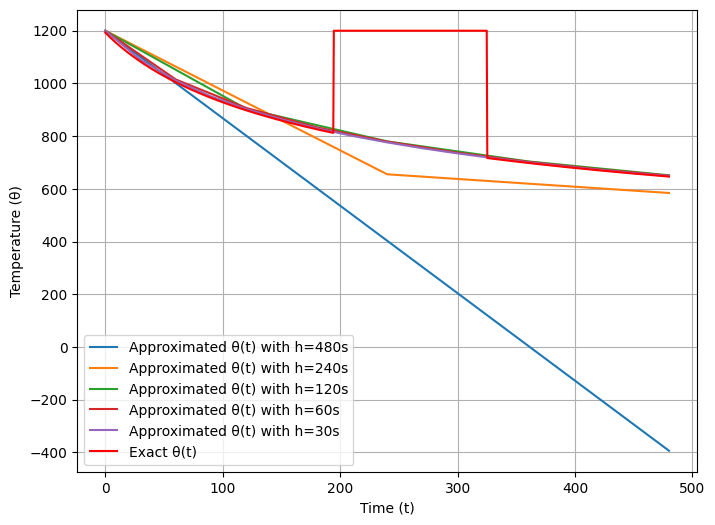

In [ ]:
def plot_approximations(step_sizes):
    exact_value = find_exact_solution(480)
    exact_theta_480 = find_exact_solution(480)

    plt.figure(figsize=(8, 6))

    for step_size in step_sizes:
        times = np.linspace(0, 480, int(480/step_size) + 1)
        approximated_values = [RungeKutta2(0, 1200, step_size, t) for t in times]
        plt.plot(times, approximated_values, label=f'Approximated θ(t) with h={step_size}s')

    step_sizes_for_exact = np.linspace(0, 480, 1000)
    exact_values = [find_exact_solution(t) for t in step_sizes_for_exact]
    plt.plot(step_sizes_for_exact, exact_values, color='red', label='Exact θ(t)')


    plt.xlabel('Time (t)')
    plt.ylabel('Temperature (θ)')
    plt.legend()
    plt.grid(True)
    plt.show()


step_sizes = [480, 240, 120, 60, 30]


plot_approximations(step_sizes)


Your graph should look something like,
<br>
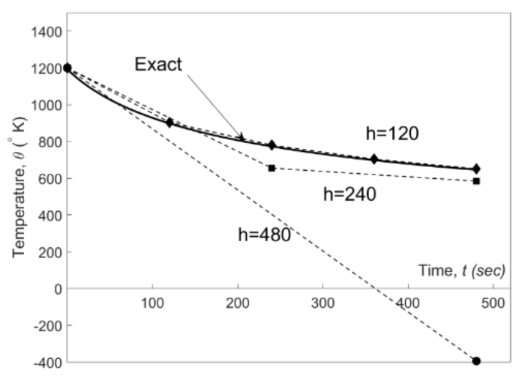